In [1]:
import random

import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

import tengp
from gpbenchmarks import get_data


def pdivide(x, y):
    return np.divide(x, y, out=np.copy(x), where=x!=0)

def plog(x, y):
    return np.log(x, out=np.copy(x), where=x>0)

def psin(x, y):
    return np.sin(x)

def pcos(x, y):
    return np.cos(x)

def pow2(x, y):
    return x**2

def pow3(x, y):
    return x**3

def ptan(x, y):
    return np.tan(x)

def ptanh(x, y):
    return np.tanh(x)

def psqrt(x, y):
    return  np.sqrt(x)

def pexp(x, y):
    return np.exp(x)


funset = tengp.FunctionSet()
funset.add(np.add, 2)
funset.add(np.subtract, 2)
funset.add(np.multiply, 2)
funset.add(pdivide, 2)
funset.add(plog, 2)
funset.add(psin, 2)
funset.add(pcos, 2)

#     function set: +, -, *, /, sin, cos, tan, tanh, sqrt, exp, log, **2, **3
ext_funset = tengp.FunctionSet()
ext_funset.add(np.add, 2)
ext_funset.add(np.subtract, 2)
ext_funset.add(np.multiply, 2)
ext_funset.add(pdivide, 2)
ext_funset.add(psin, 2)
ext_funset.add(pcos, 2)
ext_funset.add(ptan, 2)
ext_funset.add(ptanh, 2)
ext_funset.add(psqrt, 2)
ext_funset.add(pexp, 2)
ext_funset.add(plog, 2)
ext_funset.add(pow2, 2)
ext_funset.add(pow3, 2)

params1d = tengp.Parameters(2, 1, 1, 50, funset, real_valued=True)
params2d = tengp.Parameters(3, 1, 1, 50, funset, real_valued=True)
params5d = tengp.Parameters(6, 1, 1, 50, ext_funset, real_valued=True)

functions = [('nguyenf4', params1d, [20, -1, 1]), ('nguyenf7', params1d, [20, 0, 2]), ('nguyenf10', params2d, [100, -1, 1]), ('korns12', params5d, [10000, -50, 50])]

# Single mutation

In [6]:
%%time

results = []

for f in functions:
    random.seed(42) # for repeatability
    print(f[0])
    params = f[1]
    x, y = get_data(f[0], *f[2])
    x = np.c_[np.ones(len(x)), x]
    bounds = tengp.individual.IndividualBuilder(f[1]).create().bounds[:]
    
    problem_results = []

    for i in range(100):
        print(i, end=',')
        res = tengp.simple_es(x, y, mean_squared_error, params, mutation='single')
        problem_results.append(res[0].fitness)
    print()
    results.append(problem_results)
    

nguyenf4
0,

/home/jarino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:102: RuntimeWarning: invalid value encountered in multiply
  u = a*f_u(L, U)
/home/jarino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()


1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,
nguyenf7
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,
nguyenf10
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,
korns12
0,

/home/jarino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: overflow encountered in exp
/home/jarino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in sqrt


1,

/home/jarino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in square


2,

/home/jarino/anaconda3/lib/python3.6/site-packages/sklearn/metrics/regression.py:239: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
/home/jarino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in true_divide
  del sys.path[0]


3,4,5,6,7,

/home/jarino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in power


8,9,10,11,12,

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:125: RuntimeWarning: overflow encountered in multiply
  value = (1-coeff)*self.nodes[lower].value + coeff*self.nodes[upper].value
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:125: RuntimeWarning: invalid value encountered in add
  value = (1-coeff)*self.nodes[lower].value + coeff*self.nodes[upper].value


13,14,15,16,17,18,19,

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:101: RuntimeWarning: overflow encountered in multiply
  l = (1-a)*f_l(L, U)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:102: RuntimeWarning: overflow encountered in multiply
  u = a*f_u(L, U)


20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,

/home/jarino/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:70: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,
CPU times: user 40min 16s, sys: 7.53 s, total: 40min 24s
Wall time: 41min 43s


In [7]:
def plot_results(outs):
    costs = np.array(outs)
    print('mean:', np.mean(costs))
    print('median:', np.median(costs))
    print('variance:',np.var(costs))
    print('min:', np.min(costs))
    sns.distplot(costs);

Nguyen4
mean: 0.0652252162132108
median: 0.03211473978356684
variance: 0.011429347235512177
min: 2.5387608526912543e-30


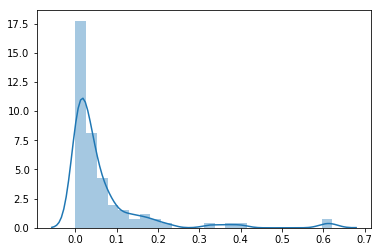

In [8]:
print('Nguyen4')
plot_results(results[0])

Nguyen7
mean: 0.005125906196955109
median: 0.0016332621911482725
variance: 7.655448983702039e-05
min: 0.0001596838140089845


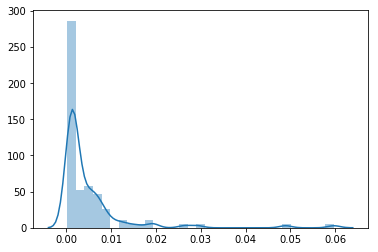

In [9]:
print('Nguyen7')
plot_results(results[1])

Nguyen10
mean: 0.00866591507166235
median: 0.006049868318559125
variance: 0.00010879288530455247
min: 6.859392089929579e-31


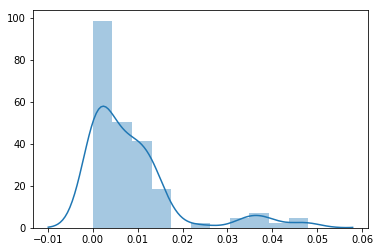

In [10]:
print('Nguyen10')
plot_results(results[2])

Korns12
mean: 1.0470599361645962
median: 1.0394683393076791
variance: 0.0802131590544999
min: 0.4804313656643282


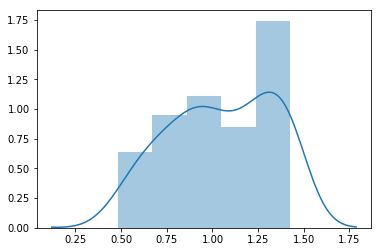

In [11]:
print('Korns12')
plot_results(results[3])